In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [2]:
from sklearn.linear_model import LinearRegression

def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:,0] ** 2 + 4 * X[:, 1] ** 3
    return y

X = np.arange(0, 4).reshape(2, 2)

print(X)
y = polynomial_func(X)
print(y)

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print(np.round(model.coef_, 2))
print(model.coef_.shape)

[[0 1]
 [2 3]]
[  5 125]
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
(10,)


In [3]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print(np.round(model.named_steps['linear'].coef_, 2))

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [4]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

p_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'R2 score: {r2_score(y_test, y_preds):.3f}')

MSE: 15.556, RMSE: 3.944
R2 score: 0.782


In [5]:
p_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'R2 score: {r2_score(y_test, y_preds):.3f}')

MSE: 79625.594, RMSE: 282.180
R2 score: -1116.598


In [6]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

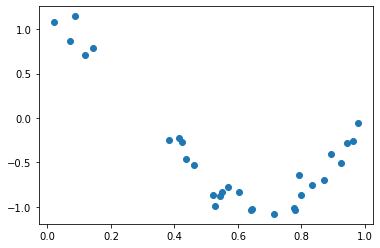

In [8]:
plt.scatter(X, y)


Degree: 1
회귀계수: [-1.61]
MSE: 0.41

Degree: 4
회귀계수: [  0.47 -17.79  23.59  -7.26]
MSE: 0.04

Degree: 15
회귀계수: [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08]
MSE: 182581084.83


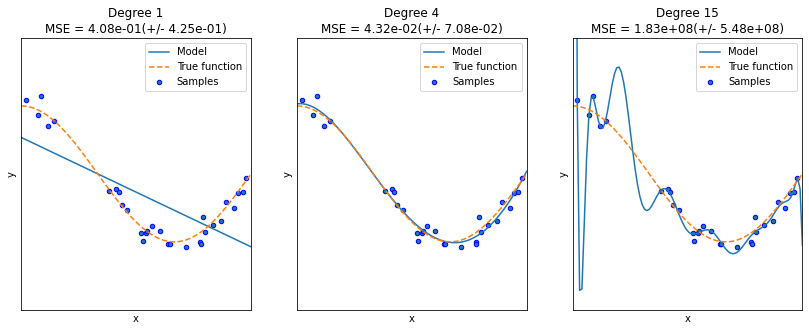

In [9]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
    ])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print(f'\nDegree: {degrees[i]}\n회귀계수: {np.round(coefficients, 2)}\nMSE: {-1 * np.mean(scores):.2f}')
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title(f'Degree {degrees[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})')
    
plt.show()